# BOOK DATASET
Use the association rules on book dataset to understand the business problem and provide solutions.

## BUSINESS OBJECTIVE
* Maximize Book Sales
* Maximize Popularity
* Minimize Churn rate

## CONSTRAINTS
* Internet Access
* Identifying Customer segments

Importing the required libraries

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori , association_rules
from termcolor import colored

Loading the dataset

In [2]:
df0=pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass9\book.csv")
df=df0.copy()
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


## EXPLORATORY DATA ANALYSIS
The below lines gives a very basic understanding of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [4]:
df.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


__To find the number of books available in each book category__

In [5]:
cb=pd.DataFrame(df['ChildBks'].value_counts())
yb=pd.DataFrame(df['YouthBks'].value_counts())
Cb=pd.DataFrame(df['CookBks'].value_counts())
db=pd.DataFrame(df['DoItYBks'].value_counts())
rb=pd.DataFrame(df['RefBks'].value_counts())
ab=pd.DataFrame(df['ArtBks'].value_counts())
gb=pd.DataFrame(df['GeogBks'].value_counts())
ic=pd.DataFrame(df['ItalCook'].value_counts())
ia=pd.DataFrame(df['ItalAtlas'].value_counts())
Ia=pd.DataFrame(df['ItalArt'].value_counts())
f=pd.DataFrame(df['Florence'].value_counts())
print(colored('The number of books available in each category are as follows : \n','blue',attrs=['bold']))
print(colored('Child Books : ','blue',attrs=['bold']),cb.iat[1,0],'\n')
print(colored('Youth Books : ','blue',attrs=['bold']),yb.iat[1,0],'\n')
print(colored('Cook Books : ','blue',attrs=['bold']),Cb.iat[1,0],'\n')
print(colored('Do It Yourself Books : ','blue',attrs=['bold']),db.iat[1,0],'\n')
print(colored("Reference Books (Atlases,Encyclopedias,Dictionaries) : ",'blue',attrs=['bold']),rb.iat[1,0],'\n')
print(colored('Art Books : ','blue',attrs=['bold']),ab.iat[1,0],'\n')
print(colored('Geography Books : ','blue',attrs=['bold']),gb.iat[1,0],'\n')
print(colored('Secrets of Italian Cooking : ','blue',attrs=['bold']),ic.iat[1,0],'\n')
print(colored('Historical Atlas of Italy : ','blue',attrs=['bold']),ia.iat[1,0],'\n')
print(colored('Italian Art : ','blue',attrs=['bold']),Ia.iat[1,0],'\n')
print(colored('The Art History of Florence : ','blue',attrs=['bold']),f.iat[1,0],'\n')

The number of books available in each category are as follows : 

Child Books :  846 

Youth Books :  495 

Cook Books :  862 

Do It Yourself Books :  564 

Reference Books (Atlases,Encyclopedias,Dictionaries) :  429 

Art Books :  482 

Geography Books :  552 

Secrets of Italian Cooking :  227 

Historical Atlas of Italy :  74 

Italian Art :  97 

The Art History of Florence :  217 



__Most Frequent Itemsets based on Support__

Using the mlxtend library to use the apriori algorithm, the minimum support is set to 0.05 which means the minimum number of books should be 100 in each category.

In [6]:
frequent_itemsets= apriori(df,min_support=0.050,max_len=4,use_colnames=True)
frequent_itemsets.sort_values('support',ascending=False,inplace=True)
frequent_itemsets.head()

C:\Users\lenny\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
2,0.431,(CookBks)
0,0.423,(ChildBks)
3,0.282,(DoItYBks)
6,0.276,(GeogBks)
10,0.256,"(CookBks, ChildBks)"


Checking the number of itemsets.

In [7]:
frequent_itemsets.shape

(98, 2)

__Plotting the itemsets with higher support values__

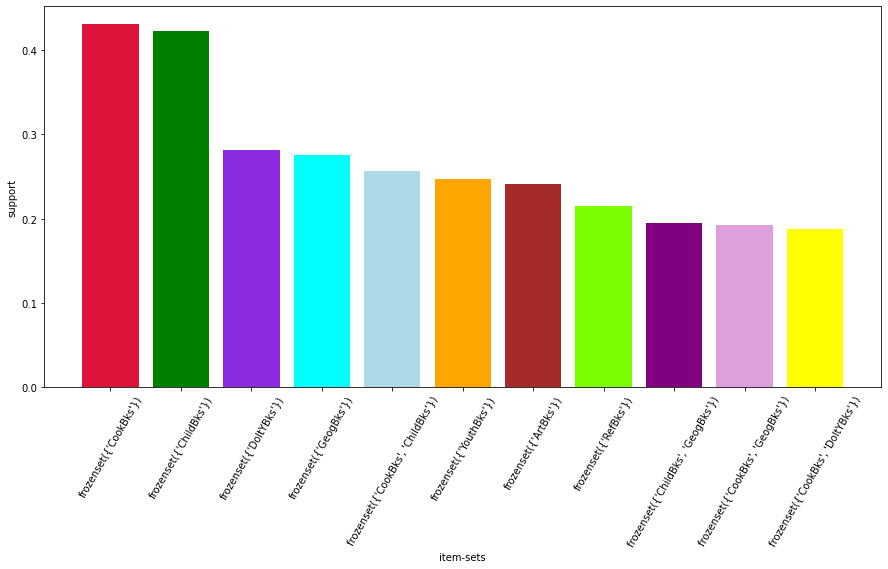

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.bar(x=list(range(0,11)),height=frequent_itemsets.support[0:11],color=['crimson','green','blueviolet','cyan','lightblue','orange','brown','lawngreen','purple','plum','yellow'])
plt.xticks(list(range(0, 11)), frequent_itemsets.itemsets[0:11], rotation=60)
plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()

Using the association rules from mlxtend to get the support, confidence and lift values. Setting the min value for lift to 1 as anything below that indicates lower chance of it being bought. 

In [9]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.shape

(602, 9)

In [10]:
rules=rules.sort_values('lift',ascending=False)
rules=rules.reset_index()
rules.head(10)

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,420,(ItalCook),"(YouthBks, CookBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193
1,417,"(YouthBks, CookBks)",(ItalCook),0.1620,0.1135,0.0590,0.364198,3.208789,0.040613,1.394301
2,534,"(ItalCook, ChildBks)","(GeogBks, CookBks)",0.0850,0.1925,0.0525,0.617647,3.208556,0.036137,2.111923
3,531,"(GeogBks, CookBks)","(ItalCook, ChildBks)",0.1925,0.0850,0.0525,0.272727,3.208556,0.036137,1.258125
4,535,"(CookBks, ChildBks)","(GeogBks, ItalCook)",0.2560,0.0640,0.0525,0.205078,3.204346,0.036116,1.177474
5,530,"(GeogBks, ItalCook)","(CookBks, ChildBks)",0.0640,0.2560,0.0525,0.820312,3.204346,0.036116,4.140522
6,537,(ItalCook),"(GeogBks, CookBks, ChildBks)",0.1135,0.1495,0.0525,0.462555,3.094014,0.035532,1.582488
7,528,"(GeogBks, CookBks, ChildBks)",(ItalCook),0.1495,0.1135,0.0525,0.351171,3.094014,0.035532,1.366307
8,518,"(YouthBks, ChildBks)","(DoItYBks, RefBks)",0.1650,0.1055,0.0530,0.321212,3.044665,0.035592,1.317790
9,519,"(DoItYBks, RefBks)","(YouthBks, ChildBks)",0.1055,0.1650,0.0530,0.502370,3.044665,0.035592,1.677952


#### Profusion Removal
from the above table its clear that there are many duplicates so following the below steps to remove the duplicates. 

In [11]:
#Using a custom function which returns a list.
def to_list(i):
    return (list(i))
#The antecedents and consequents are separately added to a list and concatenated creating a series. 
ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)
#The series is then sorted in alphabetical order.
ma_X = ma_X.apply(sorted)
#The series is then saved to rules_sets as a list. 
rules_sets = list(ma_X)
#To eliminate the duplicates the list is then converted into a tuple and then again converted to a list.
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
#Creating a empty list
index_rules = []
#storing the index number of the remaining itemsets in index_rules.
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

# getting rules without any redudancy/profusion
rules_no_redudancy = rules.iloc[index_rules, :]

# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift', ascending = False).head(10)

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,420,(ItalCook),"(YouthBks, CookBks)",0.1135,0.1620,0.0590,0.519824,3.208789,0.040613,1.745193
2,534,"(ItalCook, ChildBks)","(GeogBks, CookBks)",0.0850,0.1925,0.0525,0.617647,3.208556,0.036137,2.111923
8,518,"(YouthBks, ChildBks)","(DoItYBks, RefBks)",0.1650,0.1055,0.0530,0.321212,3.044665,0.035592,1.317790
14,451,"(ArtBks, CookBks)",(ItalCook),0.1670,0.1135,0.0565,0.338323,2.980822,0.037545,1.339778
16,351,"(ArtBks, CookBks)","(GeogBks, DoItYBks)",0.1670,0.1325,0.0650,0.389222,2.937521,0.042873,1.420319
18,361,"(GeogBks, CookBks)",(ItalCook),0.1925,0.1135,0.0640,0.332468,2.929229,0.042151,1.328025
20,168,"(CookBks, ChildBks)",(ItalCook),0.2560,0.1135,0.0850,0.332031,2.925385,0.055944,1.327158
22,486,"(GeogBks, CookBks)","(YouthBks, ArtBks)",0.1925,0.1010,0.0560,0.290909,2.880288,0.036557,1.267821
24,581,"(GeogBks, RefBks)","(YouthBks, ChildBks)",0.1105,0.1650,0.0515,0.466063,2.824626,0.033267,1.563856
28,496,"(YouthBks, GeogBks)","(ArtBks, ChildBks)",0.1205,0.1625,0.0550,0.456432,2.808809,0.035419,1.540744


## INSIGHTS
* Italian cookbooks, Youth books , cook books, children books and geography books have the highest values of lift and the support is also more than 0.05 which means more than 100 books have been bought.
* The chance of buying a cook book or an italian cookbook increase when either one is bought.
* similarly the chance of buying a children book , youth book and geographic book also increase when either one of them is bought.

## CONCLUSION
* From the above insights we can deduce that majority of the customers belong to a younger group who are independent and need help with cooking or young couples who have children.
* So introducing book segments which are interesting to the young customer base would help to increase the revenue and reduce the loss of customers.